In [162]:
#Import Required Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [133]:
nameDict= {'customerID':'object','gender':'object','seniorCitizen':'object','partner':'object','dependents': 'object' ,'tenure':'Int64','phoneService':'object','multipleLines':'object','internetService':'object','onlineSecurity':'object','onlineBackup':'object','deviceProtection':'object','techSupport':'object','streamingTV':'object','streamingMovies':'object','contract':'object','paperlessBilling':'object','paymentMethod':'object','monthlyCharges':np.float64,'totalCharges':np.float64,'churn':'object'}

In [177]:
# Import dataset from csv
df = pd.read_csv("telcoCustomerChurn.csv", header = 0, names = ['customerID','gender','seniorCitizen','partner','dependents','tenure','phoneService','multipleLines','internetService','onlineSecurity','onlineBackup','deviceProtection','techSupport','streamingTV','streamingMovies','contract','paperlessBilling','paymentMethod','monthlyCharges','totalCharges','churn'], na_values = " ",dtype=nameDict)

# Print firs
#df.head()
df.info() 
#Totalcharges needs to be changed to numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
seniorCitizen       7043 non-null object
partner             7043 non-null object
dependents          7043 non-null object
tenure              7043 non-null int64
phoneService        7043 non-null object
multipleLines       7043 non-null object
internetService     7043 non-null object
onlineSecurity      7043 non-null object
onlineBackup        7043 non-null object
deviceProtection    7043 non-null object
techSupport         7043 non-null object
streamingTV         7043 non-null object
streamingMovies     7043 non-null object
contract            7043 non-null object
paperlessBilling    7043 non-null object
paymentMethod       7043 non-null object
monthlyCharges      7043 non-null float64
totalCharges        7032 non-null float64
churn               7043 non-null object
dtypes: float64(2), int64(1), o

In [178]:
df['totalCharges'][488]

nan

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
seniorCitizen       7043 non-null object
partner             7043 non-null object
dependents          7043 non-null object
tenure              7043 non-null int64
phoneService        7043 non-null object
multipleLines       7043 non-null object
internetService     7043 non-null object
onlineSecurity      7043 non-null object
onlineBackup        7043 non-null object
deviceProtection    7043 non-null object
techSupport         7043 non-null object
streamingTV         7043 non-null object
streamingMovies     7043 non-null object
contract            7043 non-null object
paperlessBilling    7043 non-null object
paymentMethod       7043 non-null object
monthlyCharges      7043 non-null float64
totalCharges        7032 non-null float64
churn               7043 non-null object
dtypes: float64(2), int64(1), o

In [179]:
# Check for Null Values
df.isnull().values.any()
print(df.isnull().sum())

customerID           0
gender               0
seniorCitizen        0
partner              0
dependents           0
tenure               0
phoneService         0
multipleLines        0
internetService      0
onlineSecurity       0
onlineBackup         0
deviceProtection     0
techSupport          0
streamingTV          0
streamingMovies      0
contract             0
paperlessBilling     0
paymentMethod        0
monthlyCharges       0
totalCharges        11
churn                0
dtype: int64


In [180]:
df[df['tenure']==0]=df[df['tenure']==0].replace(np.nan,0)

In [258]:
df.shape

(7043, 21)

In [181]:
print(df.isnull().sum())

customerID          0
gender              0
seniorCitizen       0
partner             0
dependents          0
tenure              0
phoneService        0
multipleLines       0
internetService     0
onlineSecurity      0
onlineBackup        0
deviceProtection    0
techSupport         0
streamingTV         0
streamingMovies     0
contract            0
paperlessBilling    0
paymentMethod       0
monthlyCharges      0
totalCharges        0
churn               0
dtype: int64


In [182]:
# Checking the data we see that for the missing values in question, the blank values come from an initally terminated contract with a tenure of 0, 
# instead of removing this data I will decide to fill it in as it may be useful.
df.isnull().values.any()


False

In [214]:
# Check class totals to examine evidence for imbalanced classes
pd.crosstab(df.churn,df.churn, normalize = True)

churn       No      Yes
churn                  
No     0.73463  0.00000
Yes    0.00000  0.26537

In [215]:
# Examining Satistical Summary to see all is in order
df.describe()

tenure  monthlyCharges  totalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [218]:
# Check for duplicated values
df.duplicated().values.sum()

0

In [226]:
# Rebalancing unbalanced classes using SMOTE resampling, by first importing relevant packages
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install imbalanced-learn

  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [260]:
from imblearn.over_sampling import SMOTENC
# make a new df made of all the columns, except the target class
X = df.loc[:, df.columns != 'churn']
y = df.churn
smote_nc = SMOTENC(categorical_features=range(0,18), random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

In [261]:
print(sorted(Counter(y_resampled).items()))

[('No', 5174), ('Yes', 5174)]


In [262]:
X_resampled.head(5)

customerID  gender seniorCitizen partner dependents  tenure phoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

      multipleLines internetService onlineSecurity onlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  deviceProtection techSupport streamingTV streamingMovies        contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  paperlessBilling              paymentMethod  monthlyCharges  totalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65

In [266]:
# Might be adding wrong columns here so check
smotedf=X
smotedf['churn']=y
smotedf

customerID  gender seniorCitizen partner dependents  tenure  \
0     7590-VHVEG  Female             0     Yes         No       1   
1     5575-GNVDE    Male             0      No         No      34   
2     3668-QPYBK    Male             0      No         No       2   
3     7795-CFOCW    Male             0      No         No      45   
4     9237-HQITU  Female             0      No         No       2   
5     9305-CDSKC  Female             0      No         No       8   
6     1452-KIOVK    Male             0      No        Yes      22   
7     6713-OKOMC  Female             0      No         No      10   
8     7892-POOKP  Female             0     Yes         No      28   
9     6388-TABGU    Male             0      No        Yes      62   
10    9763-GRSKD    Male             0     Yes        Yes      13   
11    7469-LKBCI    Male             0      No         No      16   
12    8091-TTVAX    Male             0     Yes         No      58   
13    0280-XJGEX    Male             0      No         No      49   
14    5129-JLPIS    Male             0      No         No      25   
15    3655-SNQYZ  Female             0     Yes        Yes      69   
16    8191-XWSZG  Female             0      No         No      52   
17    9959-WOFKT    Male             0      No        Yes      71   
18    4190-MFLUW  Female             0     Yes        Yes      10   
19    4183-MYFRB  Female             0      No         No      21   
20    8779-QRDMV    Male             1      No         No       1   
21    1680-VDCWW    Male             0     Yes         No      12   
22    1066-JKSGK    Male             0      No         No       1   
23    3638-WEABW  Female             0     Yes         No      58   
24    6322-HRPFA    Male             0     Yes        Yes      49   
25    6865-JZNKO  Female             0      No         No      30   
26    6467-CHFZW    Male             0     Yes        Yes      47   
27    8665-UTDHZ    Male             0     Yes        Yes       1   
28    5248-YGIJN    Male             0     Yes         No      72   
29    8773-HHUOZ  Female             0      No        Yes      17   
...          ...     ...           ...     ...        ...     ...   
7013  1685-BQULA  Female             0      No         No      40   
7014  9053-EJUNL    Male             0      No         No      41   
7015  0666-UXTJO    Male             1     Yes         No      34   
7016  1471-GIQKQ  Female             0      No         No       1   
7017  4807-IZYOZ  Female             0      No         No      51   
7018  1122-JWTJW    Male             0     Yes        Yes       1   
7019  9710-NJERN  Female             0      No         No      39   
7020  9837-FWLCH    Male             0     Yes        Yes      12   
7021  1699-HPSBG    Male             0      No         No      12   
7022  7203-OYKCT    Male             0      No         No      72   
7023  1035-IPQPU  Female             1     Yes         No      63   
7024  7398-LXGYX    Male             0     Yes         No      44   
7025  2823-LKABH  Female             0      No         No      18   
7026  8775-CEBBJ  Female             0      No         No       9   
7027  0550-DCXLH    Male             0      No         No      13   
7028  9281-CEDRU  Female             0     Yes         No      68   
7029  2235-DWLJU  Female             1      No         No       6   
7030  0871-OPBXW  Female             0      No         No       2   
7031  3605-JISKB    Male             1     Yes         No      55   
7032  6894-LFHLY    Male             1      No         No       1   
7033  9767-FFLEM    Male             0      No         No      38   
7034  0639-TSIQW  Female             0      No         No      67   
7035  8456-QDAVC    Male             0      No         No      19   
7036  7750-EYXWZ  Female             0      No         No      12   
7037  2569-WGERO  Female             0      No         No      72   
7038  6840-RESVB    Male             0     Yes        Yes      24   
7039

# Preliminary Data Visualization

C:\Users\arnav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


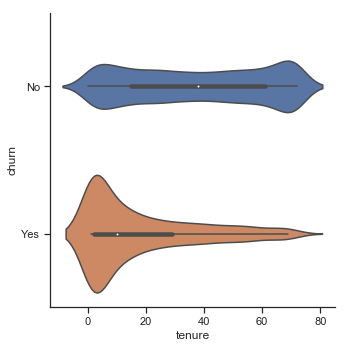

In [269]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="tenure", y="churn", kind="violin",
            data=df.sort_values("tenure"));

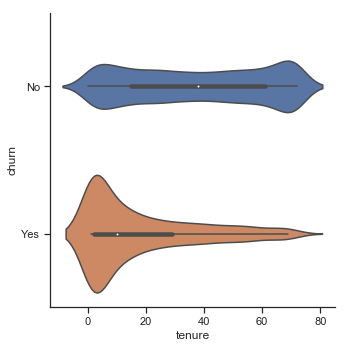

In [270]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="tenure", y="churn", kind="violin",
            data=smotedf.sort_values("tenure"));

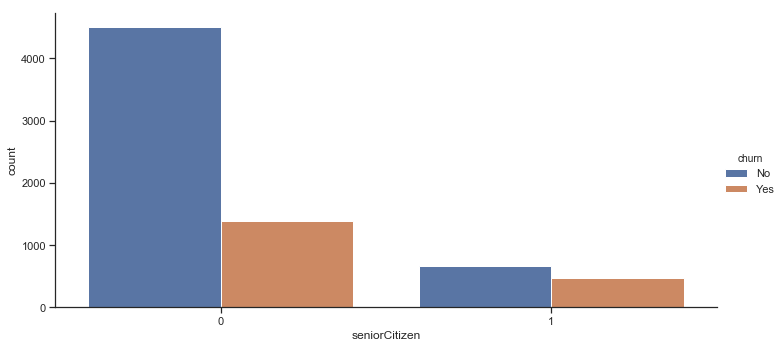

In [275]:
 sns.catplot("seniorCitizen", data=df, aspect=2,hue="churn",
                       kind="count")

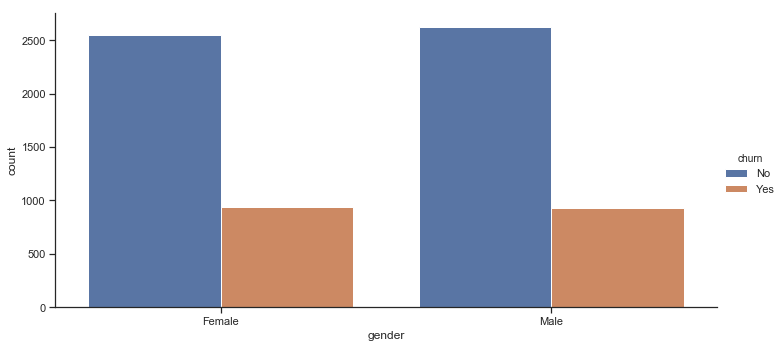

In [276]:
sns.catplot("gender", data=df, aspect=2,hue="churn",
                       kind="count")

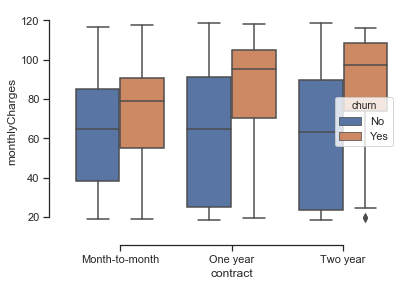

In [277]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="contract", y="monthlyCharges",
            hue="churn",
            data=df)
sns.despine(offset=15, trim=True)

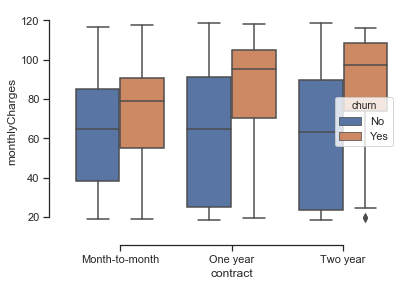

In [277]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="contract", y="monthlyCharges",
            hue="churn",
            data=df)
sns.despine(offset=15, trim=True)

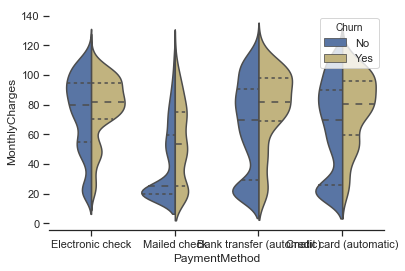

In [12]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="PaymentMethod", y="MonthlyCharges", hue="Churn",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=df)
sns.despine(left=True)

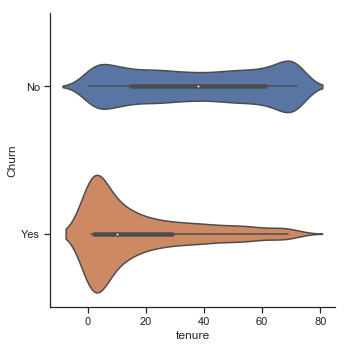

In [13]:
sns.catplot(x="tenure", y="Churn", data=df, kind="violin")

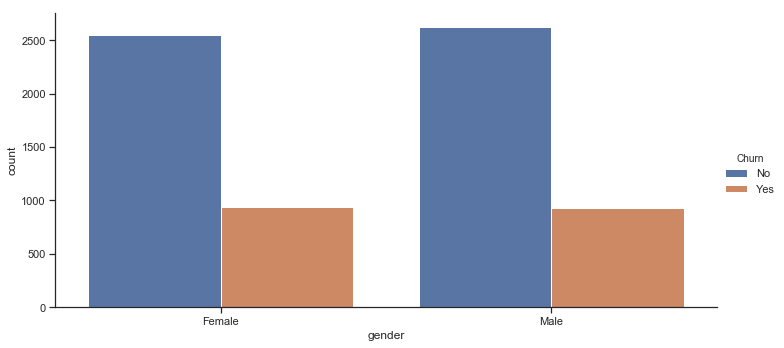

In [24]:
g = sns.catplot("gender", data=df, aspect=2,hue="Churn",
                       kind="count")

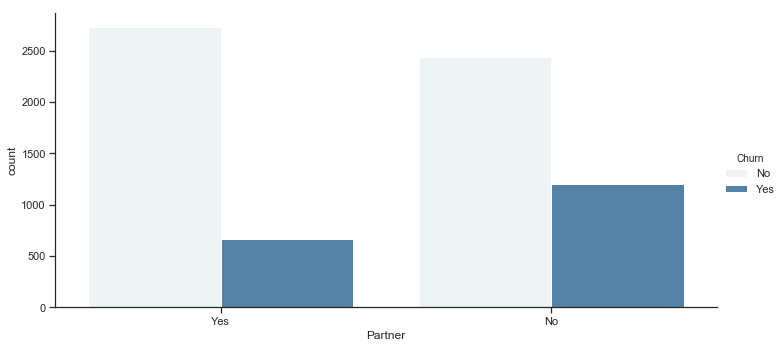

In [19]:
g = sns.catplot("Partner", data=df, aspect=2,hue="Churn",
                       kind="count", color='steelblue')

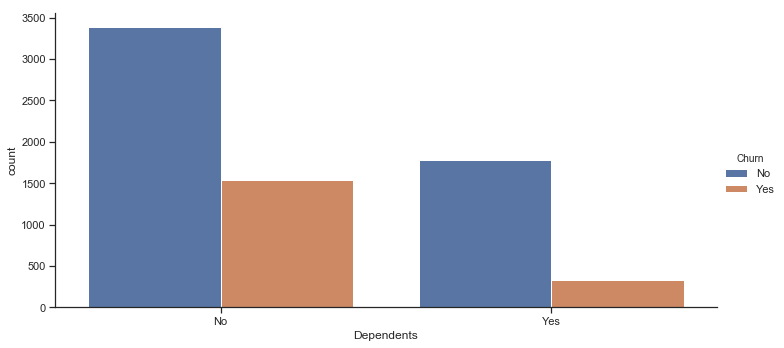

In [25]:
g = sns.catplot("Dependents", data=df, aspect=2,hue="Churn",
                       kind="count")

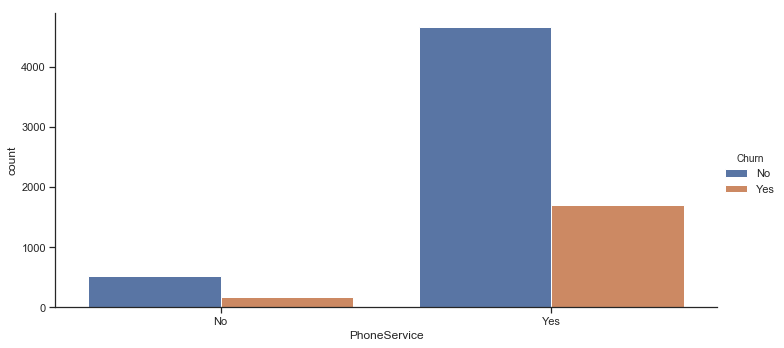

In [26]:
g = sns.catplot("PhoneService", data=df, aspect=2,hue="Churn",
                       kind="count")

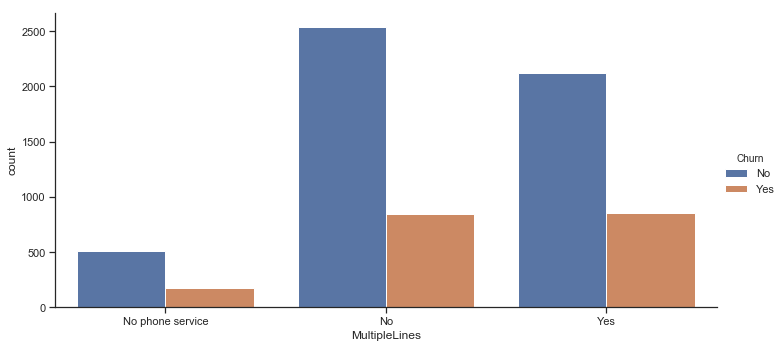

In [27]:
g = sns.catplot("MultipleLines", data=df, aspect=2,hue="Churn",
                       kind="count")

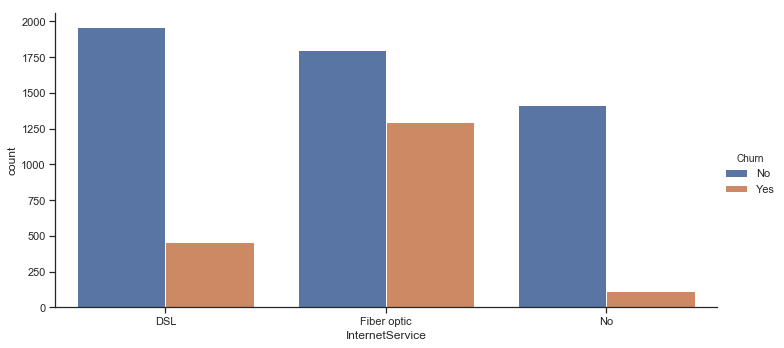

In [28]:
g = sns.catplot("InternetService", data=df, aspect=2,hue="Churn",
                       kind="count")

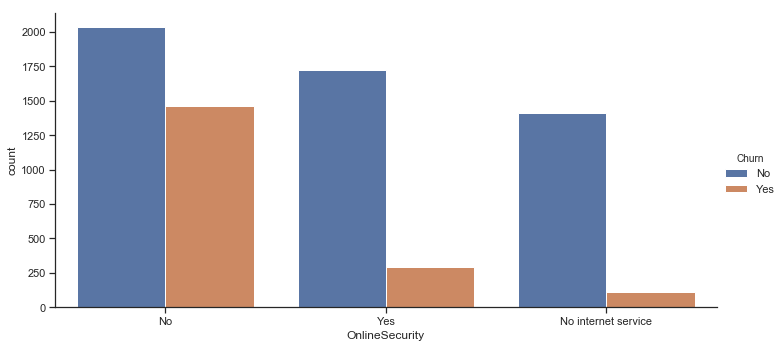

In [30]:
g = sns.catplot("OnlineSecurity", data=df, aspect=2,hue="Churn",
                       kind="count")

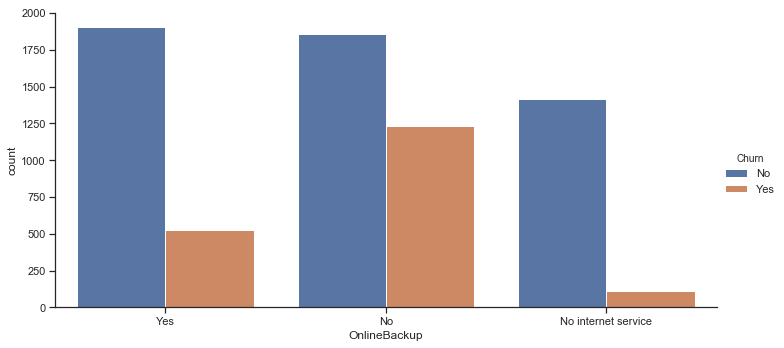

In [31]:
g = sns.catplot("OnlineBackup", data=df, aspect=2,hue="Churn",
                       kind="count")

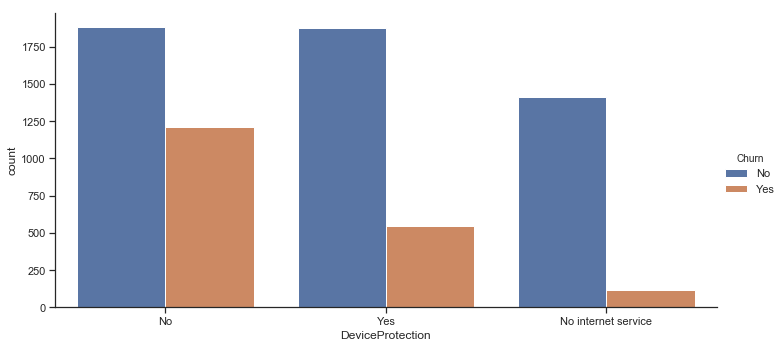

In [33]:
g = sns.catplot("DeviceProtection", data=df, aspect=2,hue="Churn",
                       kind="count")

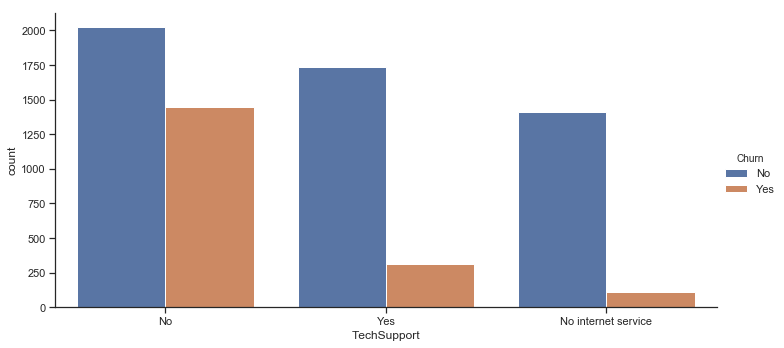

In [34]:
g = sns.catplot("TechSupport", data=df, aspect=2,hue="Churn",
                       kind="count")

In [35]:
g = sns.catplot("StreamingTV", data=df, aspect=2,hue="Churn",
                       kind="count")

In [36]:
g = sns.catplot("StreamingMovies", data=df, aspect=2,hue="Churn",
                       kind="count")

In [37]:
g = sns.catplot("PaperlessBilling", data=df, aspect=2,hue="Churn",
                       kind="count")